# Math 450 Homework 6
# Spatial Models
## Hongshuo Wang

In [1]:
from numpy import *
from scipy import linalg, random, integrate
from matplotlib.pyplot import *
import random

# 1. Another important form of Zipf's law is the citation patterns found in scientific articles. Rather than doing equations, let's make a simulation of a simplified version of this.

## (a) Start with a list containing the integers 1 and 2.

In [2]:

l = [1,2]
l

[1, 2]

## (b) Choose one number randomly from the list and append it back to the list. You can use the sample() function from the "random" module to do this.

In [3]:
picked_num = random.sample(l,1)[0]
picked_num

1

In [4]:
l.append(picked_num)
print(len(l))
print(l)

3
[1, 2, 1]


## (c) Append the next number (3) to the list.

In [5]:
l.append(3)
l

[1, 2, 1, 3]

## (d) Repeat these last two steps 1,000 times, incrementing the new number each time until you get a list of 2,002 integers.

In [6]:
for i in range(999):
    picked_num = random.sample(l,1)[0]
    l.append(picked_num)
    l.append(3+i)
print(len(l))
print(l)

2002
[1, 2, 1, 3, 1, 3, 3, 4, 3, 5, 3, 6, 3, 7, 4, 8, 8, 9, 3, 10, 9, 11, 10, 12, 5, 13, 3, 14, 8, 15, 15, 16, 15, 17, 9, 18, 13, 19, 8, 20, 9, 21, 3, 22, 9, 23, 3, 24, 24, 25, 16, 26, 26, 27, 4, 28, 3, 29, 5, 30, 8, 31, 28, 32, 15, 33, 24, 34, 27, 35, 10, 36, 15, 37, 32, 38, 15, 39, 1, 40, 18, 41, 25, 42, 32, 43, 3, 44, 32, 45, 32, 46, 26, 47, 25, 48, 39, 49, 18, 50, 29, 51, 24, 52, 22, 53, 22, 54, 15, 55, 16, 56, 8, 57, 9, 58, 5, 59, 28, 60, 26, 61, 26, 62, 54, 63, 42, 64, 58, 65, 5, 66, 55, 67, 47, 68, 23, 69, 8, 70, 69, 71, 3, 72, 3, 73, 8, 74, 47, 75, 22, 76, 34, 77, 18, 78, 28, 79, 34, 80, 3, 81, 32, 82, 67, 83, 40, 84, 30, 85, 39, 86, 76, 87, 6, 88, 55, 89, 15, 90, 15, 91, 16, 92, 58, 93, 15, 94, 56, 95, 71, 96, 1, 97, 67, 98, 27, 99, 39, 100, 32, 101, 54, 102, 41, 103, 3, 104, 3, 105, 32, 106, 76, 107, 8, 108, 3, 109, 18, 110, 15, 111, 10, 112, 34, 113, 3, 114, 29, 115, 96, 116, 15, 117, 60, 118, 52, 119, 9, 120, 97, 121, 26, 122, 34, 123, 22, 124, 1, 125, 47, 126, 22, 127, 16,

## Now, count up how many times each integer appears in the list and plot a rank-value plot on a log-log scale. Explain how we know that the plot exhibits a power-law scaling, and approximate the scaling exponent.

In [7]:
import collections
counter=collections.Counter(l)
print(counter)

Counter({3: 60, 15: 48, 1: 26, 8: 22, 32: 20, 26: 19, 7: 17, 24: 15, 9: 14, 47: 14, 76: 14, 16: 13, 29: 12, 34: 12, 86: 12, 10: 11, 4: 10, 117: 10, 21: 9, 22: 9, 30: 9, 39: 9, 18: 8, 31: 8, 41: 8, 97: 8, 110: 8, 168: 8, 5: 7, 12: 7, 27: 7, 42: 7, 45: 7, 103: 7, 205: 7, 238: 7, 260: 7, 424: 7, 13: 6, 55: 6, 57: 6, 67: 6, 69: 6, 71: 6, 96: 6, 106: 6, 115: 6, 126: 6, 142: 6, 161: 6, 229: 6, 250: 6, 265: 6, 285: 6, 301: 6, 339: 6, 6: 5, 25: 5, 28: 5, 62: 5, 68: 5, 101: 5, 114: 5, 124: 5, 167: 5, 256: 5, 257: 5, 338: 5, 349: 5, 418: 5, 510: 5, 11: 4, 19: 4, 40: 4, 46: 4, 54: 4, 58: 4, 59: 4, 61: 4, 64: 4, 87: 4, 116: 4, 130: 4, 131: 4, 133: 4, 146: 4, 173: 4, 177: 4, 179: 4, 195: 4, 197: 4, 199: 4, 201: 4, 245: 4, 247: 4, 252: 4, 323: 4, 334: 4, 462: 4, 482: 4, 568: 4, 614: 4, 656: 4, 20: 3, 33: 3, 37: 3, 38: 3, 43: 3, 44: 3, 49: 3, 51: 3, 52: 3, 56: 3, 60: 3, 72: 3, 74: 3, 81: 3, 99: 3, 107: 3, 108: 3, 109: 3, 111: 3, 112: 3, 113: 3, 118: 3, 134: 3, 144: 3, 147: 3, 160: 3, 163: 3, 176: 3, 

In [8]:
values = counter.values()
values = list(values)
values

[26,
 2,
 60,
 10,
 7,
 5,
 17,
 22,
 14,
 11,
 4,
 7,
 6,
 1,
 48,
 13,
 1,
 8,
 4,
 3,
 9,
 9,
 2,
 15,
 5,
 19,
 7,
 5,
 12,
 9,
 8,
 20,
 3,
 12,
 2,
 1,
 3,
 3,
 9,
 4,
 8,
 7,
 3,
 3,
 7,
 4,
 14,
 2,
 3,
 1,
 3,
 3,
 2,
 4,
 6,
 3,
 6,
 4,
 4,
 3,
 4,
 5,
 1,
 4,
 1,
 1,
 6,
 5,
 6,
 2,
 6,
 3,
 1,
 3,
 1,
 14,
 2,
 1,
 1,
 1,
 3,
 2,
 2,
 2,
 1,
 12,
 4,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 6,
 8,
 1,
 3,
 1,
 5,
 2,
 7,
 1,
 2,
 6,
 3,
 3,
 3,
 8,
 3,
 3,
 3,
 5,
 6,
 4,
 10,
 3,
 2,
 1,
 2,
 2,
 1,
 5,
 1,
 6,
 1,
 1,
 1,
 4,
 4,
 2,
 4,
 3,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 6,
 1,
 3,
 1,
 4,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 3,
 6,
 1,
 3,
 1,
 1,
 1,
 5,
 8,
 1,
 2,
 1,
 1,
 4,
 1,
 1,
 3,
 4,
 1,
 4,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 3,
 3,
 4,
 2,
 4,
 1,
 4,
 1,
 4,
 1,
 1,
 1,
 7,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 1,
 3,
 6,
 2,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1

The length of list: 1001


<ipython-input-9-f32e04981489>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


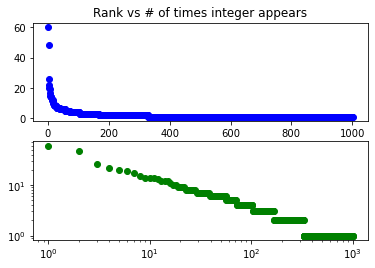

In [9]:

#plt.figure(figsize = (10,10))

n = len(values)
print(f"The length of list: {n}")
values.sort()
values.reverse()
rank = range(1,n+1)
fig, axs = subplots(2,1)
axs[0].plot(rank, values, 'bo')
axs[0].set_title("Rank vs # of times integer appears")

axs[1].loglog(rank, values, 'go')
#axs[1].set_title("Rank vs # of times integer appears in log-log scale")
fig.show()

According to simple law lecture and above two graphs, we can roughly get the relation between rank and number of times integer appears as a straight line in log-log scale. That meet the power laws generic equation.

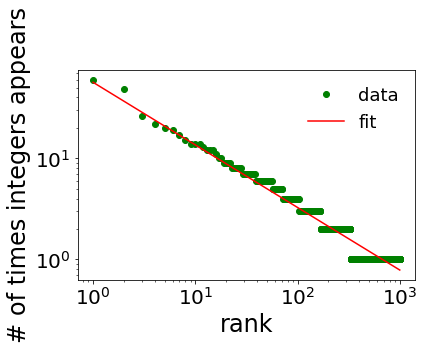

In [10]:

## Fit power law & plot
coeff = polyfit(log(rank),log(values),1)
# prints the polynomial expression
rank2=array(range(1,1000))
y_fitted = exp(coeff[1])*rank2**coeff[0]
loglog(rank,values, 'go')
loglog(rank2,y_fitted, 'r')
legend(['data', 'fit'],fontsize=18,framealpha=0.)
ylabel('# of times integers appears',fontsize=24)
xlabel('rank',fontsize=24)
xticks(fontsize=20)
yticks(fontsize=20)
tight_layout()

show()

## 2. The "neighborhood" in a regular lattice defines the geometry of the space. In class, we discussed 4 different kinds of neighborhoods for 2-dimensional lattice on a Cartesian grid {8-neighbor Moore, the 6-neighbor, the 4-neighbor von Neumann, and the 3-neighbor.

## (a) Let Nk(x; y) be the set of neighbors of site (x; y) where x and y are integers. If k = 3, then

$$N_{4}(x,y) = \{(x-1,y),(x+1,y),(x,y-1),(x,y+1)\}$$

$$N_{6}(x,y) = \{(x-1,y),(x+1,y),(x,y-1),(x,y+1),(x+1,y+1),(x-1,y-1)\}$$

$$N_{8}(x,y) = \{(x-1,y),(x+1,y),(x,y-1),(x,y+1),(x+1,y-1),(x-1,y+1),(x+1,y+1),(x-1,y-1)\}$$

## (b) In a regular lattice, the atomic loop length is the smallest number of neighboring edges in loop from (0; 0) back to itself where the same edge between two neighbors is never traversed more than once. Each such loop with this minimal loop length is called an "atomic loop". For each k 2 f3; 4; 6; 8g, find the atomic loop length and the number of atomic loops containing (0; 0) for lattices with neighborhoods Nk(x; y).

For $N_{3}$, the atomic loop length is 6 and the number of atomic loops containing(0,0) is 3

For $N_{4}$, the atomic loop length is 4 and the number of atomic loops containing(0,0) is 4

For $N_{6}$, the atomic loop length is 3 and the number of atomic loops containing(0,0) is 6

For $N_{8}$, the atomic loop length is 3 and the number of atomic loops containing(0,0) is 12


## (c) Given a neighborhood Nk(x; y), we can define a metric dk((x; y); (u; v)) to measure the distance between points (x; y) and (u; v) recursively as follows:

<img src="q2c_1.jpg">

<img src="q2c_2.jpg">

## (d) For each k 2 f3; 4; 6; 8g, find dk((0, 0); (3, 3)).

For k = 3, dk = 6

For k = 4, dk = 6

For k = 6, dk = 3

For k = 8, dk = 3


## 3. Apply renormalization theory to estimate the percolation threshold under site percolation with Moore neighborhoods.

Zoom into a 2x3 square
say $p = p_{1}$ is void fraction and let $p_2$ = probaility that you can percolate from top to bottom.

If all grid is empty, $$\rightarrow p^{6}$$

If 3 are empty -- i.e., any of the 4 is occupied $$\rightarrow4p^{3}(1-p)$$

If 2 are empty, can sometimes get through (this part is differernt with lecture)




<img src="q3_1.jpg">

$$\rightarrow probability \,\,4p^{2}(1-p)^{2}$$

If the occupied grids >= 3 or 0 or 1 grid is empty, cannot get through.

so the probability of percolation in the 2x2 grid with Moore neighborhood is

$$p_{2} = p_{1}^{4} + 4p_{1}^{3}(1-p_{1}) + 4p_{1}^{2}(1-p_{1})^{2}$$

By renormalization hypothesis, $p_{1} = p_{2} = p_{c}$

$$p_{c} = p_{c}^{4} + 4p_{c}^{3}(1-p_{c}) + 4p_{c}^{2}(1-p_{c})^{2}$$



By matlab,

we get percolation threshold $p_{c} \approx 0.382 $

## 4. What is the dual lattice of bond percolation on a hexagonal neighborhood? What does this imply about the percolation thresholds of the two lattices?

According to the wiki

In the theory of lattices, the dual lattice is a construction analogous to that of a dual vector space. In certain respects, the geometry of the dual lattice of a lattice L is the reciprocal of the geometry of L, a perspective which underlies many of its uses.

The dual lattice of bond percolation on a hexagonal neighbourhood is the reciprocal of the geometry of princple hexagonal lattice that can be gotten by turning the square lattice 45 degree clockwise.

<img src="q4.jpg">

Thus, similarly in the lecture, if the dual lattice is permeable from left to right, then our principle lattice will be impermeable from top to bottom. Vice versa. The only different is the lattice now becomes hexagonal above.

$$\rightarrow p_{c} = 0.5$$

## 5. Calculating percolation depth algorithmically can be done recursively as described in class. See code posted in `Spatial Models' section on Percolation.

## (a) Let A(p;N) be a random 0=1 matrix with shape N x N where sites are filled (1) with probability p, and empty (0) with probability 1 - p. Recall that in class, we generated example matrices like this with the python code

In [11]:
from scipy import *

<ipython-input-12-7412875651ed>:6: DeprecationWarning: scipy.rand is deprecated and will be removed in SciPy 2.0.0, use numpy.random.rand instead
  A = floor(rand(n,n)+p)
<ipython-input-12-7412875651ed>:6: DeprecationWarning: scipy.floor is deprecated and will be removed in SciPy 2.0.0, use numpy.floor instead
  A = floor(rand(n,n)+p)


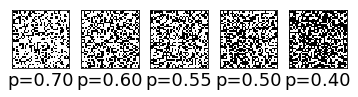

In [12]:
n=40
i=1
ps = [0.3, 0.4, 0.45, 0.5,0.6]

for p in ps:
    A = floor(rand(n,n)+p)
    subplot(1,len(ps), i)
    i += 1
    spy(A)
    xlabel('p=%.2f'%(1-p), fontsize=18)
    gca().get_xaxis().set_ticks([])
    gca().get_yaxis().set_ticks([])

show()

<ipython-input-13-34098338d8a9>:58: DeprecationWarning: scipy.rand is deprecated and will be removed in SciPy 2.0.0, use numpy.random.rand instead
  A = floor(rand(n,n)+1 - p)
<ipython-input-13-34098338d8a9>:58: DeprecationWarning: scipy.floor is deprecated and will be removed in SciPy 2.0.0, use numpy.floor instead
  A = floor(rand(n,n)+1 - p)
<ipython-input-13-34098338d8a9>:62: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  total_value = sum(list(counter.values()))
<ipython-input-13-34098338d8a9>:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  d.append(sum(values[:i+1])/total_value)


1000
1000
1000
1000
1000


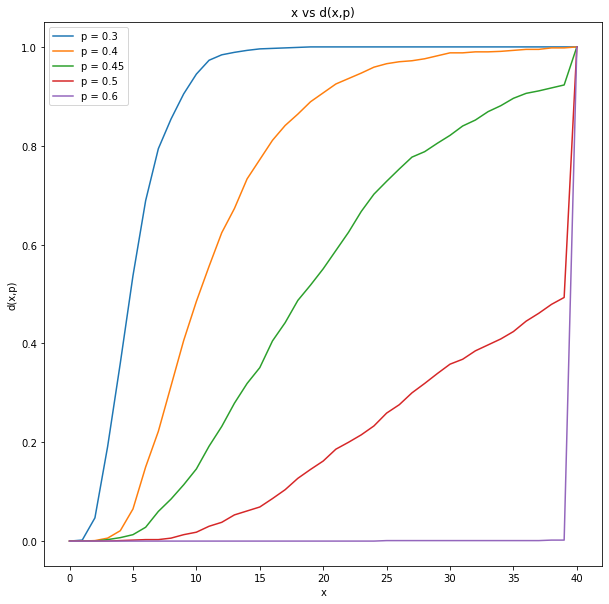

In [13]:
def printbinarymatrix(A):
    m,n = A.shape
    newline='\n'
    f = lambda i : (" " if i < 0.5 else "#")
    s = newline.join([ "|%s|"%"".join([f(i) for i in row]) for row in A])
    s = newline.join(["+%s+"%("-"*n),s,"+%s+"%("-"*n)])
    print(s)
    return

def calc_percolation_depth(A, i0=None):
    """
    Given an array A of {0,1}'s, find the farthest across the
    matrix we can walk on 0-entries, when
    using a von Neumann neighborhood, if we start
    at the left side in row i0.

    If i0 == None, return the maximum over all initial rows.

    This version uses avoids recursion, and can be accelerated.
    """

    N = A.shape[1]
    if i0 == None:
        return max([calc_percolation_depth(A,i) for i in range(N)])

    neighbors = ((0,1), (1,0), (-1,0), (0,-1), (1,-1),(-1,1))
    visited = A.copy()
    best = 0
    stack = [ (i0,0) ]
    while stack:
        i,j = stack.pop()
        if j == N:
            return N
        if i < 0 or i >= A.shape[0] or j < 0 or visited[i,j]:
            continue
        visited[i,j] = 1
        best = max(best, j+1)
        stack.extend([ (i+x,j+y) for (x,y) in neighbors])
    return best



def test():
    
    n=40
    ps = [0.3, 0.4, 0.45, 0.5,0.6]
    
    figure(figsize = (10,10))
    xlabel('x')
    ylabel('d(x,p)')
    title('x vs d(x,p)')
    
    for p in ps:
        counter = {}
        for i in range(n+1):
            counter[i] = 0
        for i in range(1000):
            A = floor(rand(n,n)+1 - p)
            max_depth = calc_percolation_depth(A)
            counter[int(max_depth)] += 1
            
        total_value = sum(list(counter.values()))
        print(total_value)
        d = []
        values = list(counter.values())
        for i in range(n+1):
            d.append(sum(values[:i+1])/total_value)
        plot(range(0,n+1), d, label="p = " + str(p))
        
    legend()
    show()


test()

## (b) What particular feature of your plot change when p is between 0:45 and 0:5? What does this change mean?

All the line have their largest increasing rate between 0.45 and 0.5. Particularly, for line p = 0.5, it increases dramatically after this range. For the rest lines, most of their max depth locates between x = 37 and x = 39.

## (c) Suppose we define h(p;N) as the fraction of N xN A(p;N) matrices which percolate all the way through. Plot h(p;N) as a function of p 2 [0:3; 0:6] (this is an INTERVAL, not a set!) for N 2 f5; 10; 20; 50; 100g. Use atleast 1000 matrices for each. (Warning: This calculation may take you a long time.)

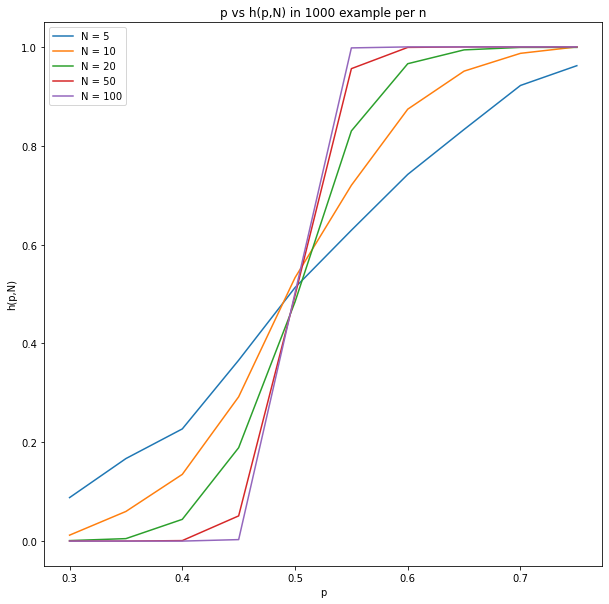

In [14]:
from numpy import *
from matplotlib.pyplot import *

def printbinarymatrix(A):
    m,n = A.shape
    newline='\n'
    f = lambda i : (" " if i < 0.5 else "#")
    s = newline.join([ "|%s|"%"".join([f(i) for i in row]) for row in A])
    s = newline.join(["+%s+"%("-"*n),s,"+%s+"%("-"*n)])
    print(s)
    return

def calc_percolation_depth(A, i0=None):
    """
    Given an array A of {0,1}'s, find the farthest across the
    matrix we can walk on 0-entries, when
    using a von Neumann neighborhood, if we start
    at the left side in row i0.

    If i0 == None, return the maximum over all initial rows.

    This version uses avoids recursion, and can be accelerated.
    """

    N = A.shape[1]
    if i0 == None:
        return max([calc_percolation_depth(A,i) for i in range(N)])

    neighbors = ((0,1), (1,0), (-1,0), (0,-1), (1,-1),(-1,1))
    visited = A.copy()
    best = 0
    stack = [ (i0,0) ]
    while stack:
        i,j = stack.pop()
        if j == N:
            return N
        if i < 0 or i >= A.shape[0] or j < 0 or visited[i,j]:
            continue
        visited[i,j] = 1
        best = max(best, j+1)
        stack.extend([ (i+x,j+y) for (x,y) in neighbors])
    return best



def test():
    ns= [5, 10, 20, 50 , 100]
    ps = arange(0.3, 0.8, 0.05)
    #print(ps)
    figure(figsize = (10,10))
    xlabel('p')
    ylabel('h(p,N)')
    title('p vs h(p,N) in 1000 example per n')
    
    
    
    
    for n in ns:
        output = [0.0]*len(ps)
            
        for i in range(len(ps)):
            c = 0
            p = ps[i]
            for j in range(1000):
                A = array(random.rand(n,n) + 1 - p, dtype=int)
                max_depth = calc_percolation_depth(A)
                #print(max_depth)
                if max_depth == int(n):
                    c += 1
            #print(output)
            output[i] = c/1000.0
            
       
        #print(output)
        plot(ps, output, label="N = " + str(n))
        #print(output)
    legend()
    show()
    
    


test()

## (d) Extrapolating from your plot, what do you think will happen to limN!1 h(p;N)?

It should be in 0.0 for a whole time until near p = 0.45, it dramatically increases (like a straight line perpendicular to the x-axis) to h(p,n) = 1 then stick on 1
The graph looks very similar as the graph void fraction vs fraction percolating to depth n. 

## (e) Reality, of course, is often three-dimensional, rather than two-dimensional. Describe how you think the percolation threshold will change when we switch from two dimensions to three dimensions and why it will change.

According to what we are mentioned in the lecture, the shape of locations of neighbours doesn't matter. I don't think it will change since the number of neighbours does not change.

## 6. Search the web for a new cellular automata model that we have not already discussed in class. Your rule should be different from your classmates.

## (a) Specify the rules of the cellular automata in enough detail that we can program it.

### The Game of Life

<img src="q6_1.PNG">

Assumptions：

1. "two-dimensional matrix of cells. As with the elementary CA, the possible states are 0 or 1. Only in this case, since we’re talking about “life," 0 means dead and 1 means alive" (Shiffman, 2012).

2. "If a neighbor is an adjacent cell, a neighborhood is now nine cells instead of three" (Shiffman, 2012).

3. "Death. If a cell is alive (state = 1) it will die (state becomes 0) under the following circumstances " (Shiffman, 2012).

    "Overpopulation: If the cell has four or more alive neighbors, it dies " (Shiffman, 2012).

    "Loneliness: If the cell has one or fewer alive neighbors, it dies " (Shiffman, 2012).
    
4. "Birth. If a cell is dead (state = 0) it will come to life (state becomes 1) if it has exactly three alive neighbors (no more, no less) " (Shiffman, 2012).

5. "Stasis. In all other cases, the cell state does not change. To be thorough, let’s describe those scenarios" (Shiffman, 2012).

    "Staying Alive: If a cell is alive and has exactly two or three live neighbors, it stays alive" (Shiffman, 2012).

    "Staying Dead: If a cell is dead and has anything other than three live neighbors, it stays dead" (Shiffman, 2012).




## References:
Shiffman, D. (2012). The nature of code simulating natural systems with processing (1st ed.). Erscheinungsort nicht ermittelbar: Selbstverl. Retrieved 2012, from https://natureofcode.com

Shiffman, D. (2012). The nature of code. Retrieved April 30, 2021, from https://natureofcode.com/book/chapter-7-cellular-automata/




## (b) Describe the emergent phenomena exhibited by your automata. (waves, particles, solitons, oscillators, interfaces, spirals, freezing, clustering, bursting, ...)

"The initial patterns that yield intriguing results. For example, some remain static and never change" (Shiffman, 2012). 

<img src="q6_2.PNG">

"There are patterns that oscillate back and forth between two states" (Shiffman, 2012).

<img src="q6_3.PNG">

"There are also patterns that from generation to generation move about the grid" (Shiffman, 2012).

<img src="q6_4.PNG">

# Q7

According to instruction, 

$$\theta_{x,t} = \theta_0 + x\theta'(t) $$

In [13]:
import numpy as np
from numpy import log as ln

theta_0 = 1200.0
k = 2.5E-3
r_earth = 1.28E7 / 2.0
L = 2 * r_earth
der_theta = 3.6E-2


t_L = (L**2)/(k*(np.pi**2)) * ln((4.0*theta_0)/(L*(der_theta)))

theta_r = theta_0 + r_earth * der_theta

t_r = (r_earth**2)/(k*(np.pi**2)) * ln((theta_0)/(-theta_r * r_earth))

#print((L**2)/(k*(np.pi**2)))
#print(np.log((4*theta_0)/(L*(der_theta))))
print(f"t_L = {t_L}")
print(f"t_r = {t_r}")



t_L = -3.030811681195851e+16
t_r = nan


<ipython-input-13-90db7bfa0ff9>:15: RuntimeWarning: invalid value encountered in log
  t_r = (r_earth**2)/(k*(np.pi**2)) * ln((theta_0)/(-theta_r * r_earth))


## (b) Do your answers make sense? Explain.

Both answers are invalid since both t_l, t_r should be greater than zero 

## (c) Can you fix the problem by choosing better parameter estimates?

I don't think so since one of t_l or t_r always invalid which means doesn't exist

## (d) Give an intuitive explanation of why our calculations failed to make sense.

Since the given $\theta'(t)$ is a constant, no matter what value we assign it, we will have one negative value plugging into ln function which is invalid. Thus, one of t_l and t_r will always be invalid. That contradiction makes our calculation no sense.   

## Q8

$$\frac{\partial \theta}{\partial t} = \theta_0 erf(\frac{y}{2\sqrt{kt}})'$$

$$\rightarrow \theta_{0} \frac{2e^{-\frac{y}{2\sqrt{kt}}}}{\sqrt \pi} \frac{\partial}{\partial t}[\frac{y}{2\sqrt{kt}}]$$



$$\rightarrow -\theta_{0} \dfrac{ky\mathrm{e}^{-\frac{y^2}{4kt}}}{2\sqrt{{\pi}}\left(kt\right)^\frac{3}{2}}$$

$$\frac{\partial \theta}{\partial y} = \frac{1}{\sqrt{\pi}\sqrt{kt}} \frac{\partial}{\partial y}[e^{\frac{y^2}{4kt}}]$$

$$\rightarrow -\theta_0 \dfrac{y\mathrm{e}^{-\frac{y^2}{4kt}}}{2\sqrt{{\pi}}kt\sqrt{kt}}$$

$$\frac{\partial^{2} \theta}{\partial y^{2}} =  - \theta_0 \dfrac{y\mathrm{e}^{-\frac{y^2}{4kt}}}{2\sqrt{{\pi}}kt\sqrt{kt}}$$

$$ k\frac{\partial^{2} \theta}{\partial y^{2}} = \frac{\partial \theta}{\partial t}$$

$$\theta(0,t) = \theta_0 erf(0)$$

$$\rightarrow \theta \frac{2}{\sqrt{\pi}} * 0 = 0$$


Thus, $\theta(y,t) = \theta_0 erf(\frac{y}{2\sqrt{kt}})$ is the solution of the hest equation with $\theta(0,t) = 0$



## Use Maclaurin series to find the coefficients of the series approximation

$$f(0) =  \frac{2}{\sqrt{\pi}}\int_{0}^{0} e^{-u^2} \,du = 0 $$


$$f'(0) =  \frac{2}{\sqrt{\pi}} $$

$$f''(0) =  -\frac{4*0*1}{\sqrt{\pi}} $$


$$erf(x) \approx f(0) + \frac{f'(0)}{1!}x + \frac{f''(0)}{2!} + O(x^3)$$

$$a_0 = 0$$
$$a_1 = \frac{2}{\sqrt{\pi}}$$
$$a_2 = 0$$

## (c) Using only the first non-vanishing term in this series approximation, show that

$$erf(x) = \frac{2}{\sqrt{\pi}}x$$

$$\theta(y,t) = \theta_0 \frac{2}{\sqrt{\pi}}\frac{y}{2\sqrt{kt}}$$

$$\frac{\partial \theta(y,t)}{\partial y} = \frac{\theta_0}{\sqrt{\pi kt}}$$

Thus,

$$\frac{\partial \theta(0,t)}{\partial y} \approx \frac{\theta_0}{\sqrt{\pi kt}}$$


## (d) Approximate the age of the earth using this formula and the parameter estimates given above.

$$t \approx \frac{(\frac{\theta_0}{(\frac{\partial \theta(0,t)}{\partial y})})^2}{\pi k}$$

# References:
1. https://en.wikipedia.org/wiki/Dual_lattice
2. https://mathworld.wolfram.com/ElementaryCellularAutomaton.html
3. https://natureofcode.com/book/chapter-7-cellular-automata/
4. https://www.derivative-calculator.net/
5. https://www.scienceforums.net/topic/27709-maclaurin-series-of-the-error-function/